In [26]:
import click
import json
import pandas as pd
import joblib
#import autosklearn as ask
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.dummy import DummyClassifier

# reads dataset.json-file and parses it to an obj
def readFile(filepath):
    file = open(filepath, "r")
    content = file.read()
    json_content = json.loads(content)
    print(json_content.keys())
    #print(json_content["data"])
    return dotdict(json_content)

class dotdict(dict):
    """dot.notation access to dictionary attributes"""
    __getattr__ = dict.get
    __setattr__ = dict.__setitem__
    __delattr__ = dict.__delitem__


In [2]:
dataset_file_path = "./dataset.json"
dataset = readFile(dataset_file_path)
df = pd.DataFrame(dataset.data, columns=dataset.featureNames)
print(df.head)

dict_keys(['data', 'target', 'keys', 'featureNames', 'targetNames', 'description', 'traceAP'])
<bound method NDFrame.head of        minValCognitiveComplexity  minValDuplicatedLinesDensity  \
0                            290                           0.0   
1                            456                           0.0   
2                           9858                           0.0   
3                              0                           0.0   
4                              0                           0.0   
...                          ...                           ...   
11075                      18844                           0.0   
11076                          1                           0.0   
11077                       1330                           0.0   
11078                      18870                           0.0   
11079                      18877                           0.0   

       minValSecurityRating  minValBlockerViolations  minValDuplicatedBlocks  \
0 

In [3]:
x = dataset.data[:]
y = dataset.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 4, 8, 10]
}
clf = DecisionTreeClassifier()
grid_cv = GridSearchCV(clf, parameters, cv=10, n_jobs=-1)
grid_cv.fit(x_train, y_train)
print(f"Parameters of best model: {grid_cv.best_params_}")
print(f"Score of best model: {grid_cv.best_score_}")

C:\Users\Robert\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Parameters of best model: {'criterion': 'entropy', 'max_depth': None}
Score of best model: 0.7496182241436647


In [15]:
# Use best parameters:
clf = DecisionTreeClassifier(criterion=grid_cv.best_params_["criterion"], max_depth=grid_cv.best_params_["max_depth"]) 
clf.fit(x_train, y_train)
score = clf.score(x_test, y_test)

y_pred = clf.predict(x_test)
y_true = [item for sublist in y_test for item in sublist]
precision_micro = metrics.precision_score(y_true, y_pred, average="micro")
precision_macro = metrics.precision_score(y_true, y_pred, average="macro")
precision_weighted = metrics.precision_score(y_true, y_pred, average="weighted")
accuracy = metrics.accuracy_score(y_true, y_pred)
recall_micro = metrics.recall_score(y_true, y_pred, average="micro")
recall_macro = metrics.recall_score(y_true, y_pred, average="macro")
recall_weighted = metrics.recall_score(y_true, y_pred, average="weighted")

report = classification_report(y_true, y_pred)
print(report)
print(f"Accuracy: {score}")
print(f"Precision micro: {precision_micro}")
print(f"Precision macro: {precision_macro}") # macro vermutlich relevanter: Berechnet precision für jedes label und berechnet dann den mean aus allen => berücksichtigt unbalanced Datensatz besser
print(f"Precision weighted: {precision_weighted}")
print(f"Accuracy: {accuracy}")
print(f"Recall micro: {recall_micro}")
print(f"Recall macro: {recall_macro}") # macro vermutlich relevanter: Berechnet recall für jedes label und berechnet dann den mean aus allen => berücksichtigt unbalanced Datensatz besser
print(f"Recall weighted: {recall_weighted}")


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred) # x-Achse: Actual Values, y-Achse: Predicted Values
# richtige: Diagonale = 2473, falsche: alle anderen = 851, gesamt: 3324
print(cm)

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      2405
           1       0.54      0.55      0.54       740
           2       0.43      0.38      0.41       159
           3       0.32      0.35      0.33        17
           4       0.00      0.00      0.00         3

    accuracy                           0.77      3324
   macro avg       0.43      0.43      0.43      3324
weighted avg       0.77      0.77      0.77      3324

Accuracy: 0.7728640192539109
Precision micro: 0.7728640192539109
Precision macro: 0.43054402746505094
Precision weighted: 0.7721733951276702
Accuracy: 0.7728640192539109
Recall micro: 0.7728640192539109
Recall macro: 0.4315381692629196
Recall weighted: 0.7728640192539109
[[2095  285   22    3    0]
 [ 276  407   55    2    0]
 [  29   64   61    5    0]
 [   3    4    4    6    0]
 [   0    0    0    3    0]]


C:\Users\Robert\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Robert\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Robert\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Robert\anaconda3\lib\site-packages\sklearn\metrics\_classification.py

In [16]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_0 <= 1206.50
|   |--- feature_12 <= 0.50
|   |   |--- feature_6 <= 17.50
|   |   |   |--- feature_28 <= 312.50
|   |   |   |   |--- feature_28 <= 265.50
|   |   |   |   |   |--- feature_195 <= -0.85
|   |   |   |   |   |   |--- feature_71 <= 0.10
|   |   |   |   |   |   |   |--- feature_37 <= 773.00
|   |   |   |   |   |   |   |   |--- feature_43 <= 5.50
|   |   |   |   |   |   |   |   |   |--- feature_37 <= 108.50
|   |   |   |   |   |   |   |   |   |   |--- feature_180 <= -0.07
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |   |--- feature_180 >  -0.07
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |--- feature_37 >  108.50
|   |   |   |   |   |   |   |   |   |   |--- feature_171 <= -0.95
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- feature_171 >  -0.95
|   |   |   |   |   |   |   | 

Feature: 0, Score: 0.05617
Feature: 1, Score: 0.00222
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00046
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.02254
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.04092
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00665
Feature: 13, Score: 0.00218
Feature: 14, Score: 0.00209
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00040
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00740
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00449
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.04272
Feature: 29, Score: 0.00209
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00025
Feature: 32, Score: 0.00025
Feature: 33, Score: 0.02366
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00506
Fe

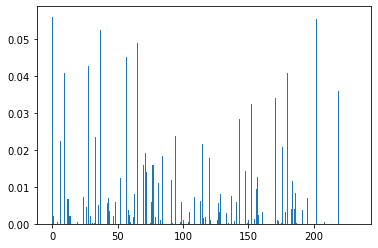

In [17]:
# Find most import features used in above decision tree 
importance = clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()


In [18]:
# sort from most important feature to least important
important_features_names = []
important_features_idxs = []
important_features_values = []

for i,v in enumerate(importance):
	if(v > 0.02):
		important_features_names.append(dataset.featureNames[i])
		important_features_idxs.append(i)
		important_features_values.append(v)
		print(dataset.featureNames[i], " ", v)

minValCognitiveComplexity   0.05617340444587014
minValSqaleIndex   0.022544943359388635
minValLines   0.040922487501245323
maxValCognitiveComplexity   0.042719894045452
maxValSqaleIndex   0.02365574165416219
maxValLines   0.05253099182344413
meanValCognitiveComplexity   0.04511265606003041
meanValLines   0.04893671035976794
minDiffLines   0.023870086306700494
maxDiffCognitiveComplexity   0.021570816066069292
meanDiffCognitiveComplexity   0.02855307634123158
meanDiffLines   0.032423502505647704
minRelDiffCognitiveComplexity   0.03416450224487384
minRelDiffSqaleIndex   0.020810854594645125
minRelDiffLines   0.04103597147566831
maxRelDiffLines   0.05545632234619272
meanRelDiffLines   0.03607681506884316


In [19]:
joblib.dump(clf, "./DecisionTreeClassifier.model")

['./DecisionTreeClassifier.model']

In [20]:
clf = joblib.load("./DecisionTreeClassifier.model")
score = clf.score(x_test, y_test)
print(f"Accuracy: {score}")

Accuracy: 0.7728640192539109


In [21]:
# GradientBoostingClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

old_parameters = {
    "loss": ["deviance", "exponential"],
    'n_estimators': [10, 20, 40],
    'criterion': ['mse', 'mae'],
    'max_depth': [None, 2, 4, 8]
}
parameters = {
    "loss": ["deviance", "exponential"],
    'n_estimators': [40],
    'criterion': ['friedman_mse'],
    'max_depth': [None, 10]
}

clf = GradientBoostingClassifier(verbose=1)
grid_cv = GridSearchCV(clf, parameters, cv=10, n_jobs=-1)
grid_cv.fit(x_train, y_train)
print(f"Parameters of best model: {grid_cv.best_params_}")
print(f"Score of best model: {grid_cv.best_score_}")

clf = RandomForestClassifier(n_estimators=grid_cv.best_params_["n_estimators"], criterion=grid_cv.best_params_["criterion"], max_depth=grid_cv.best_params_["max_depth"]) 
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
y_true = [item for sublist in y_test for item in sublist]
report = classification_report(y_true, y_pred)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred) # x-Achse: Actual Values, y-Achse: Predicted Values
print(report)
print(cm)


'\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.ensemble import GradientBoostingClassifier\n\nold_parameters = {\n    "loss": ["deviance", "exponential"],\n    \'n_estimators\': [10, 20, 40],\n    \'criterion\': [\'mse\', \'mae\'],\n    \'max_depth\': [None, 2, 4, 8]\n}\nparameters = {\n    "loss": ["deviance", "exponential"],\n    \'n_estimators\': [40],\n    \'criterion\': [\'friedman_mse\'],\n    \'max_depth\': [None, 10]\n}\n\nclf = GradientBoostingClassifier(verbose=1)\ngrid_cv = GridSearchCV(clf, parameters, cv=10, n_jobs=-1)\ngrid_cv.fit(x_train, y_train)\nprint(f"Parameters of best model: {grid_cv.best_params_}")\nprint(f"Score of best model: {grid_cv.best_score_}")\n\nclf = RandomForestClassifier(n_estimators=grid_cv.best_params_["n_estimators"], criterion=grid_cv.best_params_["criterion"], max_depth=grid_cv.best_params_["max_depth"]) \nclf.fit(x_train, y_train)\n\ny_pred = clf.predict(x_test)\ny_true = [item for sublist in y_test for item in sublist]\nrep

In [23]:
# RandomForestClassifier

old_parameters = {
    'n_estimators': [10, 20, 40, 80, 160],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 4, 8, 10],
    'verbose': [1]
}
parameters = {
    'n_estimators': [10, 80, 160, 250],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 4, 10],
}

clf = RandomForestClassifier(verbose=1)
grid_cv = GridSearchCV(clf, parameters, cv=10, n_jobs=-1)
grid_cv.fit(x_train, y_train)

print(f"Parameters of best model: {grid_cv.best_params_}")
print(f"Score of best model: {grid_cv.best_score_}")

clf = RandomForestClassifier(n_estimators=grid_cv.best_params_["n_estimators"], criterion=grid_cv.best_params_["criterion"], max_depth=grid_cv.best_params_["max_depth"]) 
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
y_true = [item for sublist in y_test for item in sublist]
report = classification_report(y_true, y_pred)
cm = confusion_matrix(y_true, y_pred) # x-Achse: Actual Values, y-Achse: Predicted Values
print(report)
# P alle positiven (alle mit label), TP alle korrekt vorhergesagten mit Label, PP = Positive predicted (alle mit label predicteten) = Spalte
# True positive rate/Recall/Sensitivity: TP / P = Richtig predicted von allen richtigen, also korrekt als 0 predictete von allen mit 0 label, korrekt als 1 predictete von ... usw
# Positive predictive value/Precision: TP / PP
# Support: So oft wurde die Klasse predicted 
print(cm)


C:\Users\Robert\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Robert\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    5.3s finished
<ipython-input-23-1ccf3ae8887d>:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train, y_train)


Parameters of best model: {'criterion': 'entropy', 'max_depth': None, 'n_estimators': 250}
Score of best model: 0.8000249418024609
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      2405
           1       0.67      0.48      0.56       740
           2       0.61      0.29      0.39       159
           3       0.33      0.18      0.23        17
           4       0.00      0.00      0.00         3

    accuracy                           0.81      3324
   macro avg       0.49      0.38      0.41      3324
weighted avg       0.79      0.81      0.79      3324

[[2285  120    0    0    0]
 [ 362  353   25    0    0]
 [  56   53   46    4    0]
 [   6    4    4    3    0]
 [   1    0    0    2    0]]


C:\Users\Robert\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Robert\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Robert\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
# Support Vector Machines and Feature Reduction PCA

# Feature Reduction - PCA
scaler = StandardScaler()
scaler.fit(dataset.data)
x_standardized = scaler.transform(x)

# Finde die Anzahl an Dimensionen, um 95% der Varianz "zu erklären"
for n_components in range(1, 120):
    pca = PCA(n_components=n_components, copy=True)
    pca.fit(x_standardized)
    explained_variance_ratio = sum(pca.explained_variance_ratio_)
    
    print(f"Sum of Explained Variance Ratio: {round(explained_variance_ratio, 4)} with: {n_components} components.")

    if explained_variance_ratio > 0.95:
        break
    else:  
        best_explained_variance_ratio = explained_variance_ratio

print("\n\n\n")
n_components = 34
pca = PCA(n_components=n_components, copy=True)
pca.fit(x_standardized)
x_pca = pca.transform(x_standardized)
print(f"Explained Variance:\n{pca.explained_variance_}")
print(f"Explained Variance Ratio:\n{pca.explained_variance_ratio_}")
print(f"Sum of Exmplained Variance Ratio:\n{sum(pca.explained_variance_ratio_)}")


x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.30)


# Kernel: rbf, linear, poly, sigmoid
# C: low <=> smooth dec. boundary, high <=> acc. more important
# gamma: low <=> higher influence, high <=> lower influence
kernel = "poly"
C = 0.5
gamma = 1 / len(dataset.featureNames)

# GridSearch
parameters = {
    'kernel': ['kernel', 'rbf', 'linear', 'poly', 'sigmoid'],
    'gamma': [1 / len(dataset.featureNames)],
    'C': [0.2, 0.5, 0.7],
}

clf = SVC(verbose=1)
grid_cv = GridSearchCV(clf, parameters, cv=10, n_jobs=-1)
grid_cv.fit(x_train, y_train)

# Train with best hyperparameters
clf = SVC(kernel=grid_cv.best_params_["kernel"], C=grid_cv.best_params_["C"], gamma=grid_cv.best_params_["gamma"], verbose=True)
y_train_flat = [item for sublist in y_train for item in sublist]
clf.fit(x_train, y_train_flat)





Sum of Explained Variance Ratio: 0.2339 with: 1 components.
Sum of Explained Variance Ratio: 0.3448 with: 2 components.
Sum of Explained Variance Ratio: 0.4175 with: 3 components.
Sum of Explained Variance Ratio: 0.4749 with: 4 components.
Sum of Explained Variance Ratio: 0.5244 with: 5 components.
Sum of Explained Variance Ratio: 0.5728 with: 6 components.
Sum of Explained Variance Ratio: 0.6099 with: 7 components.
Sum of Explained Variance Ratio: 0.6439 with: 8 components.
Sum of Explained Variance Ratio: 0.6725 with: 9 components.
Sum of Explained Variance Ratio: 0.6968 with: 10 components.
Sum of Explained Variance Ratio: 0.7193 with: 11 components.
Sum of Explained Variance Ratio: 0.74 with: 12 components.
Sum of Explained Variance Ratio: 0.7595 with: 13 components.
Sum of Explained Variance Ratio: 0.7773 with: 14 components.
Sum of Explained Variance Ratio: 0.7925 with: 15 components.
Sum of Explained Variance Ratio: 0.8073 with: 16 components.
Sum of Explained Variance Ratio: 0.

C:\Users\Robert\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Robert\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.73298088 0.73298088 0.73285218 0.71815464        nan
 0.73298121 0.73298088 0.73336698 0.68630828        nan 0.73259428
 0.73298088 0.73323828 0.68578999]
  warnings.warn(
C:\Users\Robert\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[LibSVM][LibSVM]

SVC(C=0.5, gamma=0.004291845493562232, kernel='poly', verbose=True)

In [22]:
y_pred = clf.predict(x_test)
score = clf.score(x_test, y_test)
print("Score: ", score)


y_true = [item for sublist in y_test for item in sublist]
report = classification_report(y_true, y_pred)
print(report)
cm = confusion_matrix(y_true, y_pred) # x-Achse: Actual Values, y-Achse: Predicted Values
print(cm)

Score:  0.7292418772563177
              precision    recall  f1-score   support

           0       0.73      0.99      0.84      2428
           1       0.40      0.03      0.05       713
           2       0.00      0.00      0.00       162
           3       0.00      0.00      0.00        18
           4       0.00      0.00      0.00         3

    accuracy                           0.73      3324
   macro avg       0.23      0.20      0.18      3324
weighted avg       0.62      0.73      0.63      3324

[[2405   22    1    0    0]
 [ 693   19    1    0    0]
 [ 156    6    0    0    0]
 [  18    0    0    0    0]
 [   3    0    0    0    0]]


C:\Users\Robert\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Robert\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Robert\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
# Auto-sklearn
clf = ask.classification.AutoSklearnClassifier(ensemble_size=10, time_left_for_this_task=300, per_run_time_limit=30)
clf.fit(x_train, y_train)
print(clf.sprint_statistics())

y_pred = clf.predict(x_test)
score = clf.score(x_test, y_test)
print("Score: ", score)


y_true = [item for sublist in y_test for item in sublist]
report = classification_report(y_true, y_pred)
print(report)
cm = confusion_matrix(y_true, y_pred) # x-Achse: Actual Values, y-Achse: Predicted Values
print(cm)

NameError: name 'ask' is not defined

In [28]:
# Dummy: generates predictions by respecting the training set’s class distribution.
clf = DummyClassifier(strategy="stratified")
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
score = clf.score(x_test, y_test)
print("Score: ", score)


y_true = [item for sublist in y_test for item in sublist]
report = classification_report(y_true, y_pred)
print(report)
cm = confusion_matrix(y_true, y_pred) # x-Achse: Actual Values, y-Achse: Predicted Values
print(cm)

Score:  0.5767148014440433
              precision    recall  f1-score   support

           0       0.73      0.73      0.73      2428
           1       0.21      0.22      0.22       713
           2       0.05      0.05      0.05       162
           3       0.00      0.00      0.00        18
           4       0.00      0.00      0.00         3

    accuracy                           0.58      3324
   macro avg       0.20      0.20      0.20      3324
weighted avg       0.58      0.58      0.58      3324

[[1762  555  105    5    1]
 [ 515  160   33    5    0]
 [ 125   28    8    1    0]
 [  11    6    1    0    0]
 [   3    0    0    0    0]]


In [29]:
# Dummy: always predicts the most frequent label in the training set.
clf = DummyClassifier(strategy="most_frequent")
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
score = clf.score(x_test, y_test)
print("Score: ", score)


y_true = [item for sublist in y_test for item in sublist]
report = classification_report(y_true, y_pred)
print(report)
cm = confusion_matrix(y_true, y_pred) # x-Achse: Actual Values, y-Achse: Predicted Values
print(cm)

Score:  0.7304452466907341
              precision    recall  f1-score   support

           0       0.73      1.00      0.84      2428
           1       0.00      0.00      0.00       713
           2       0.00      0.00      0.00       162
           3       0.00      0.00      0.00        18
           4       0.00      0.00      0.00         3

    accuracy                           0.73      3324
   macro avg       0.15      0.20      0.17      3324
weighted avg       0.53      0.73      0.62      3324

[[2428    0    0    0    0]
 [ 713    0    0    0    0]
 [ 162    0    0    0    0]
 [  18    0    0    0    0]
 [   3    0    0    0    0]]


C:\Users\Robert\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Robert\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Robert\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
# Dummy: always predicts the class that maximizes the class prior (like “most_frequent”) and predict_proba returns the class prior.
clf = DummyClassifier(strategy="prior")
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
score = clf.score(x_test, y_test)
print("Score: ", score)


y_true = [item for sublist in y_test for item in sublist]
report = classification_report(y_true, y_pred)
print(report)
cm = confusion_matrix(y_true, y_pred) # x-Achse: Actual Values, y-Achse: Predicted Values
print(cm)

Score:  0.7304452466907341
              precision    recall  f1-score   support

           0       0.73      1.00      0.84      2428
           1       0.00      0.00      0.00       713
           2       0.00      0.00      0.00       162
           3       0.00      0.00      0.00        18
           4       0.00      0.00      0.00         3

    accuracy                           0.73      3324
   macro avg       0.15      0.20      0.17      3324
weighted avg       0.53      0.73      0.62      3324

[[2428    0    0    0    0]
 [ 713    0    0    0    0]
 [ 162    0    0    0    0]
 [  18    0    0    0    0]
 [   3    0    0    0    0]]


C:\Users\Robert\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Robert\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Robert\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
# Dummy: generates predictions uniformly at random.
clf = DummyClassifier(strategy="uniform")
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
score = clf.score(x_test, y_test)
print("Score: ", score)


y_true = [item for sublist in y_test for item in sublist]
report = classification_report(y_true, y_pred)
print(report)
cm = confusion_matrix(y_true, y_pred) # x-Achse: Actual Values, y-Achse: Predicted Values
print(cm)

Score:  0.2078820697954272
              precision    recall  f1-score   support

           0       0.74      0.19      0.31      2428
           1       0.23      0.21      0.22       713
           2       0.04      0.19      0.07       162
           3       0.01      0.33      0.02        18
           4       0.00      0.00      0.00         3

    accuracy                           0.20      3324
   macro avg       0.20      0.19      0.12      3324
weighted avg       0.59      0.20      0.28      3324

[[473 471 519 480 485]
 [140 151 152 133 137]
 [ 28  34  31  26  43]
 [  2   3   2   6   5]
 [  0   1   0   2   0]]


In [33]:
# Dummy: always predicts a constant label that is provided by the user. This is useful for metrics that evaluate a non-majority class
clf = DummyClassifier(strategy="constant", constant=0)
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
score = clf.score(x_test, y_test)
print("Score: ", score)


y_true = [item for sublist in y_test for item in sublist]
report = classification_report(y_true, y_pred)
print(report)
cm = confusion_matrix(y_true, y_pred) # x-Achse: Actual Values, y-Achse: Predicted Values
print(cm)

Score:  0.7304452466907341
              precision    recall  f1-score   support

           0       0.73      1.00      0.84      2428
           1       0.00      0.00      0.00       713
           2       0.00      0.00      0.00       162
           3       0.00      0.00      0.00        18
           4       0.00      0.00      0.00         3

    accuracy                           0.73      3324
   macro avg       0.15      0.20      0.17      3324
weighted avg       0.53      0.73      0.62      3324

[[2428    0    0    0    0]
 [ 713    0    0    0    0]
 [ 162    0    0    0    0]
 [  18    0    0    0    0]
 [   3    0    0    0    0]]


C:\Users\Robert\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Robert\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Robert\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
